# Nerual Net for Regression

* Output Layer
   * For each feature create an output neuron - the output is predicted value
* Activation Function
   * Don't use activation function, no value limit
   * Maybe using RelU if output is always positive 
   * or softplus
* Loss
   1. Mean Squared Error
   2. mean-absolute if many outliers
   3. Huber is a combo of both

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras

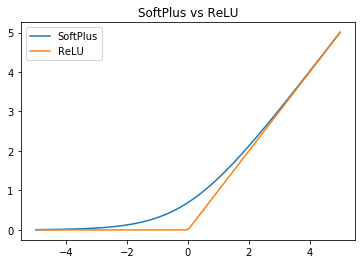

In [13]:
# Softplus looks like this (compared to ReLU)
xs = np.linspace(-5,5,100)
ys_softplus = np.log(1 + np.exp(xs))
ys_relu = np.maximum(xs, 0)
plt.plot(xs,ys_softplus,label="SoftPlus")
plt.plot(xs,ys_relu,label="ReLU")
plt.title("SoftPlus vs ReLU")
plt.legend()

## Try it Out
* California housing dataset

In [28]:
# Load, Split and Scale 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
X_train = pipeline.fit_transform(X_train) # Fit and transform on training data
X_valid = pipeline.transform(X_valid) #but use it on validation and test
X_test = pipeline.transform(X_test)



8

In [39]:
# Train
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]), #shape=[8]
    keras.layers.Dense(1) # 1 output --> target (price) 
])
model.compile(loss="mean_squared_error", optimizer="sgd")

In [40]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)) #Same as classification

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 0s 23us/sample - loss: 0.7805 - val_loss: 18.8909
Epoch 2/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.4959 - val_loss: 6.4702
Epoch 3/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.4641 - val_loss: 0.4350
Epoch 4/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.4137 - val_loss: 0.3823
Epoch 5/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.4068 - val_loss: 0.3759
Epoch 6/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.3974 - val_loss: 0.3772
Epoch 7/20
11610/11610 [==============================] - 0s 17us/sample - loss: 0.3939 - val_loss: 0.3904
Epoch 8/20
11610/11610 [==============================] - 0s 18us/sample - loss: 0.3850 - val_loss: 0.3868
Epoch 9/20
11610/11610 [==============================] - 0s 16us/sample - loss: 0.3806 - val_

In [42]:
model.evaluate(X_test, y_test) ## Accuracy has no meaning here. only loss matters

5160/5160 [==============================] - 0s 10us/sample - loss: 0.3498


0.34984456439350925

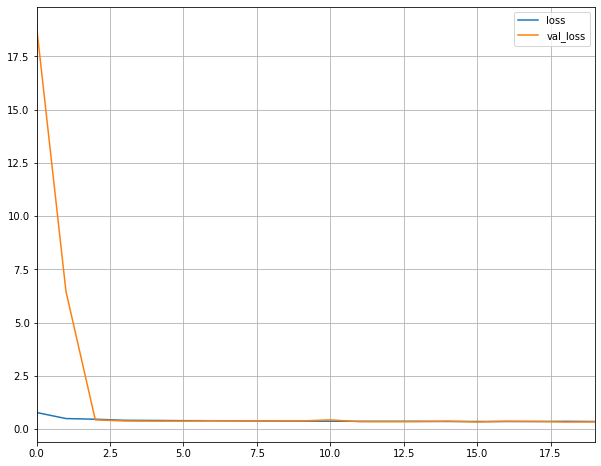

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(10, 8))
plt.grid(True)
plt.show()

## Predict

In [49]:
model.predict(X_test[:10]), y_test[:10]

(array([[0.5157758],
        [1.6753389],
        [4.123616 ],
        [2.708155 ],
        [2.9497805],
        [1.7348344],
        [2.5963998],
        [1.6152786],
        [2.6551921],
        [4.0983744]], dtype=float32),
 array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
        1.575  , 3.4    , 4.466  ]))